# Discussion Session 2: Analytical and Numerical Solutions for Value Function Iteration
## Carlos Góes (cgoes@ucsd.edu)

In [1]:
import numpy as np

# Parameters
α = 0.3
β = 0.96
A=1
Steps=1000
M=10e10
GridMin = 1e-5
GridMax = 1
MaxIter = 10000
Tol = 10e-10

We need to approximate the value function $v(K)$, which is defined over a continuous interval $(0,\infty)$. However, our computers, as a general rule, cannot handle continuous spaces, so we have to **discretize our continuous space**.

* **Step 1: construct a grid**. We do so by constructing a grid -- i.e., a set of discrete values of $K \in [\underline{K},\bar{K}]$ where $\underline{K} > 0$, $\bar{K} < \infty$:

\begin{equation*}
    G = \{ K_1, K_2, \cdots, K_n \}
\end{equation*}

with $K_1 = \underline{K}$ and $K_n = \bar{K}$; and $K_i - K_{i-1} = c$ for all $i < n$. Therefore, the grid is a equidistant set of points over the real-line ranging from $\underline{K}$ to $\bar{K}$.

In [2]:
# Fixed Matrices

## Grid
Grid = np.linspace(GridMin, GridMax, Steps)
Grid

array([1.00000000e-05, 1.01099099e-03, 2.01198198e-03, 3.01297297e-03,
       4.01396396e-03, 5.01495495e-03, 6.01594595e-03, 7.01693694e-03,
       8.01792793e-03, 9.01891892e-03, 1.00199099e-02, 1.10209009e-02,
       1.20218919e-02, 1.30228829e-02, 1.40238739e-02, 1.50248649e-02,
       1.60258559e-02, 1.70268468e-02, 1.80278378e-02, 1.90288288e-02,
       2.00298198e-02, 2.10308108e-02, 2.20318018e-02, 2.30327928e-02,
       2.40337838e-02, 2.50347748e-02, 2.60357658e-02, 2.70367568e-02,
       2.80377477e-02, 2.90387387e-02, 3.00397297e-02, 3.10407207e-02,
       3.20417117e-02, 3.30427027e-02, 3.40436937e-02, 3.50446847e-02,
       3.60456757e-02, 3.70466667e-02, 3.80476577e-02, 3.90486486e-02,
       4.00496396e-02, 4.10506306e-02, 4.20516216e-02, 4.30526126e-02,
       4.40536036e-02, 4.50545946e-02, 4.60555856e-02, 4.70565766e-02,
       4.80575676e-02, 4.90585586e-02, 5.00595495e-02, 5.10605405e-02,
       5.20615315e-02, 5.30625225e-02, 5.40635135e-02, 5.50645045e-02,
      

* **Step 2: Construct Matrix of Utilities**. Given the grid, we can calculate consumption values $C(K_i, K_j') = K_i^{\theta} - K'_{j}$ for some values of present $K_i$ and future $K_j'$ capital. We use our grid $G$ in two dimensions, and construct a utility matrix:

\begin{equation*}
    U = 
    \begin{bmatrix}
        u(C(K_1, K_1')) & u(C(K_1, K_2')) & \cdots & u(C(K_1, K_n')) \\
        \vdots & \ddots &\ddots & \vdots \\
        u(C(K_n, K_1')) & u(C(K_n, K_2')) & \cdots & u(C(K_n, K_n')) 
    \end{bmatrix}
\end{equation*}

with a non-restriction $u(\cdot)=-M$ if $C(\cdot,\cdot)<0$, where $M$ is a large number. 

In [3]:
## C
Today = np.outer(A*Grid**α,np.ones(Steps))
Tomorrow = np.outer(np.ones(Steps), Grid)
C = Today - Tomorrow
C

array([[ 3.16127766e-02,  3.06117856e-02,  2.96107946e-02, ...,
        -9.66375241e-01, -9.67376232e-01, -9.68377223e-01],
       [ 1.26296059e-01,  1.25295068e-01,  1.24294077e-01, ...,
        -8.71691959e-01, -8.72692950e-01, -8.73693941e-01],
       [ 1.55259883e-01,  1.54258892e-01,  1.53257901e-01, ...,
        -8.42728135e-01, -8.43729126e-01, -8.44730117e-01],
       ...,
       [ 9.99388984e-01,  9.98387993e-01,  9.97387002e-01, ...,
         1.40096608e-03,  3.99975085e-04, -6.01015906e-04],
       [ 9.99689597e-01,  9.98688606e-01,  9.97687615e-01, ...,
         1.70157942e-03,  7.00588426e-04, -3.00402565e-04],
       [ 9.99990000e-01,  9.98989009e-01,  9.97988018e-01, ...,
         2.00198198e-03,  1.00099099e-03,  0.00000000e+00]])

In [4]:
## U
U = - M * np.ones([Steps,Steps])
U[C>0] = np.log( (C[C>0]) )
U

array([[-3.45419392e+00, -3.48637019e+00, -3.51961630e+00, ...,
        -1.00000000e+11, -1.00000000e+11, -1.00000000e+11],
       [-2.06912645e+00, -2.07708378e+00, -2.08510493e+00, ...,
        -1.00000000e+11, -1.00000000e+11, -1.00000000e+11],
       [-1.86265490e+00, -1.86912297e+00, -1.87563315e+00, ...,
        -1.00000000e+11, -1.00000000e+11, -1.00000000e+11],
       ...,
       [-6.11202652e-04, -1.61330758e-03, -2.61641773e-03, ...,
        -6.57059323e+00, -7.82410830e+00, -1.00000000e+11],
       [-3.10450750e-04, -1.31225419e-03, -2.31506224e-03, ...,
        -6.37619839e+00, -7.26358997e+00, -1.00000000e+11],
       [-1.00000500e-05, -1.01150239e-03, -2.01400874e-03, ...,
        -6.21361760e+00, -6.90676478e+00, -1.00000000e+11]])

* **Step 3: Have a candidate value function**. We then need a starting guess $v_0 = (v_0(K_1), v_0(K_2), \cdots, v_0(K_n))$ -- this can be any guess, including a vector of zeros $v_0 = (0, 0, \cdots, 0)$.

For a given vector $v_m$, we can calculate a matrix $\tilde{V}^m$:

\begin{equation*}
    \tilde{V}^m = 
    \begin{bmatrix}
        U_{1,1} + \beta v_m(K'_1) & U_{1,2} + \beta v_m(K'_2) & \cdots & U_{1,n} + \beta v_m(K'_n) \\
        \vdots & \ddots &\ddots & \vdots \\
        U_{n,1} + \beta v_m(K'_1) & U_{n,2} + \beta v_m(K'_2) & \cdots & U_{n,n} + \beta v_m(K'_n)
    \end{bmatrix}
\end{equation*}

* **Step 4: Update the value function**. Given the results above, update our value function as:

\begin{equation*}
    v_{m+1}(K_i) = \max_{p} \tilde{V}^m_{i,p}
\end{equation*}

resulting in $v_{m+1} = (v_{m+1}(K_1), v_{m+1}(K_2), \cdots, v_{m+1}(K_n))$.

* **Step 5: Calculate update gains**: If $||v_{m+1} - v_{m}|| = \sup_{K_i} |v_{m+1}(K_i) - v_{m}(K_i)| < \varepsilon$, where $\varepsilon$ is a small error tolerance, we stop the algorithm. 

Otherwise, we go back to **Step 3**, using using $v_{m+1}$ on the right-hand-side of matrix $M$.

In [5]:
# Bellman Loop

## Create Lists to Store Results
PolicyPath = []; ValuePath = []        

## Initiate Counter + Norm Distance
Counter = 0; Norm = M

## Loop
while (Counter < MaxIter) and (Norm > Tol):
    if Counter == 0:
        v = np.zeros([Steps,1]).T

    Counter += 1
    v_m = v

    V_tilde = U + β * np.outer(np.ones([Steps,1]),np.transpose(v))

    v = np.amax(V_tilde, axis=1)
    ValuePath.append(v)
    index = np.argmax(V_tilde, axis=1)
    PolicyPath.append(Grid[index])
            
    Norm = np.max(abs(np.subtract(v_m, v)))

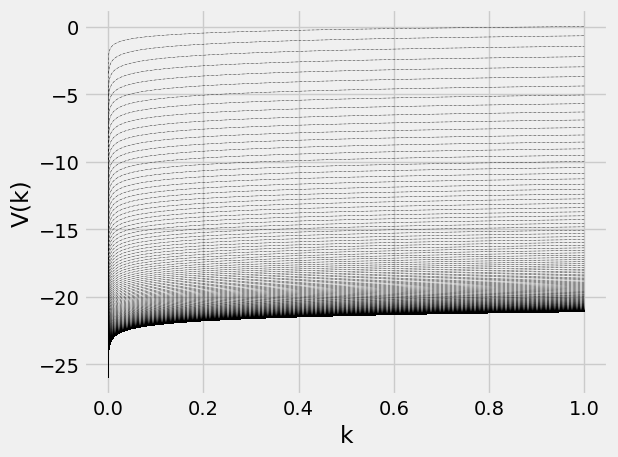

In [6]:
## Plots convergence of value function


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig1 = plt.figure()
plt.xlabel(r'K')
plt.ylabel('V(K)')

# Prints every value function stored in value
for line in ValuePath:
    plt.plot(Grid, line, '-.', linewidth=0.3, color='black')
    
plt.tight_layout()
## Plots convergence of value function
plt.show()


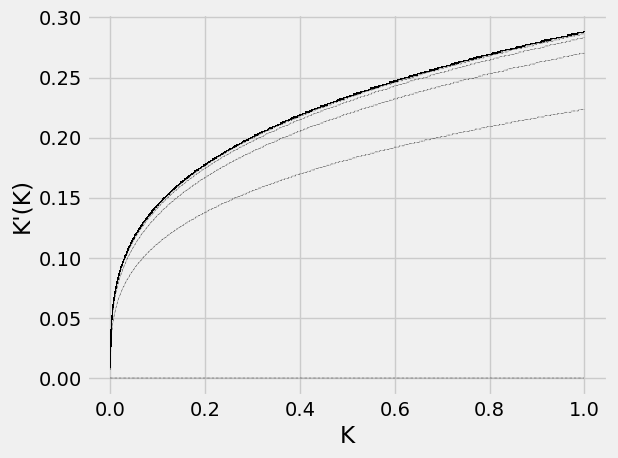

In [7]:
## Plots convergence of policy function


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig1 = plt.figure()
plt.xlabel("K")
plt.ylabel("K'(K)")

# Prints every value function stored in value
for line in PolicyPath:
    plt.plot(Grid, line, '-.', linewidth=0.3, color='black')
    
plt.tight_layout()
## Plots convergence of value function
plt.show()


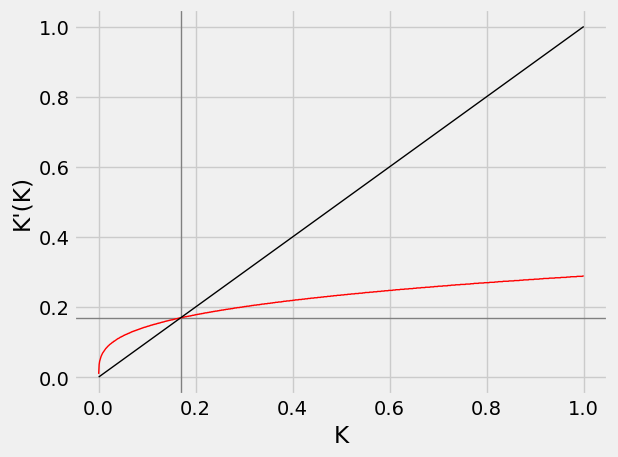

In [8]:
## Plots the final policy function and the 45 degree line (steady state).
## Compares with analytically computed steady state

K_ss = (1/(α * β * A))**(1/(α-1))

fig2 = plt.figure()
plt.xlabel("K")
plt.ylabel("K'(K)")

plt.axvline(K_ss,color='grey', linewidth=1)
plt.axhline(K_ss,color='grey', linewidth=1)
plt.plot(Grid, PolicyPath[-1], linewidth=1, color='red')
plt.plot(Grid, Grid, linewidth=1, color='black')    
plt.tight_layout()
plt.show()

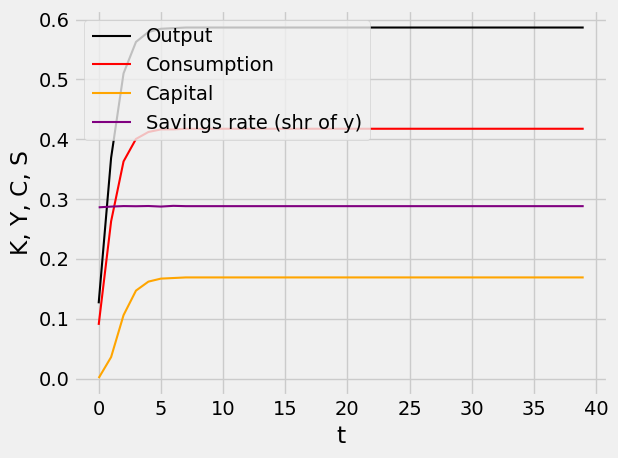

In [9]:
## Plots variable convergence to steady state

# Selects only the optimal policy and value functions
Policy, Value = PolicyPath[-1], ValuePath[-1]

# Initiates an arbitrary level of capital
Kprime = .001

# Create empty lists to store convergence
KPath, CPath, SPath, YPath = [], [], [], []

# Define horizon
T = 40

# Iterate over time to store dynamics
for period in range(T):
    K = Kprime
    Kprime = Policy[np.argmin(abs(Grid-K))]
    KPath.append(K)
    CPath.append(K**α - Kprime)
    YPath.append(K**α)
    SPath.append(Kprime/K**α)

# Plot figure
fig3 = plt.figure()
plt.xlabel(r't')
plt.ylabel('K, Y, C, S')

plt.plot(range(T), YPath, linewidth=1.5, color='black', label='Output')
plt.plot(range(T), CPath, linewidth=1.5, color='red', label='Consumption')
plt.plot(range(T), KPath, linewidth=1.5, color='orange', label='Capital')    
plt.plot(range(T), SPath, linewidth=1.5, color='purple', label='Savings rate (shr of y)')    
plt.legend(loc='upper left')    

plt.tight_layout()
plt.show()